In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#mounting drive in colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir /root/.kaggle

In [ ]:
#copying tokens to root
! cp '/content/drive/MyDrive/kaggle.json' /root/.kaggle

In [ ]:
!ls -a /root

.   .bashrc  .config   .jupyter  .keras  .npm	   .tmux.conf
..  .cache   .ipython  .kaggle	 .local  .profile  .wget-hsts


In [ ]:
#granting access permissions
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#downloading dataset from kaggle
! kaggle datasets download -d 'rupakroy/online-payments-fraud-detection-dataset'

100% 178M/178M [00:02<00:00, 77.0MB/s]
100% 178M/178M [00:02<00:00, 78.9MB/s]


In [ ]:
#unzipping file
!unzip '/content/online-payments-fraud-detection-dataset.zip' -d '/content'

Archive:  /content/online-payments-fraud-detection-dataset.zip
  inflating: /content/PS_20174392719_1491204439457_log.csv  


In [ ]:
df = pd.read_csv('./PS_20174392719_1491204439457_log.csv')

In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

<ipython-input-17-fe43fffaf13b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

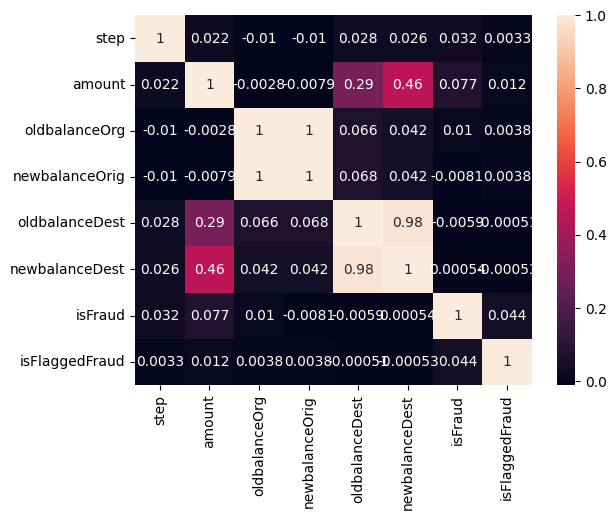

In [ ]:
sns.heatmap(df.corr(), annot = True)

from the heatmap, we see a good correletion between some feature and i will explore some of these but files i will make a function which categories figures such as ammount and balance in other to see how they correlate 

In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
# Define the thresholds for high, mid, and low balance
high_threshold = df['amount'].quantile(0.75)
mid_threshold = df['amount'].quantile(0.5)
low_threshold = df['amount'].quantile(0.25)

# Define a function to categorize the balance column
def categorize_balance(balance):
    if balance >= high_threshold:
        return 'high'
    elif balance >= mid_threshold:
        return 'mid'
    else:
        return 'low'

# Create a new column called amount_cat by applying the categorize_balance function to the balance column
df['amount_cat'] = df['amount'].apply(categorize_balance)

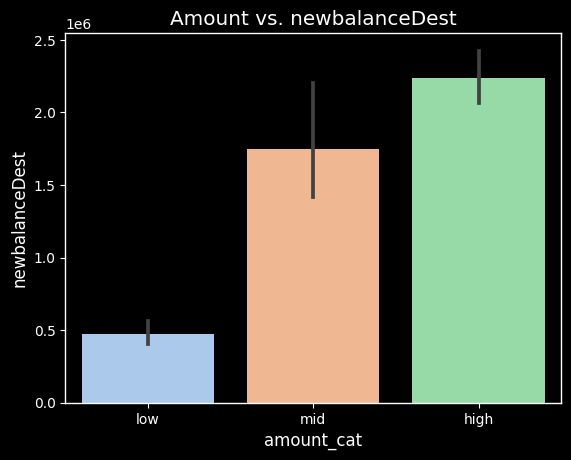

In [ ]:
sns.barplot(data = df.sample(5000), x= 'amount_cat', y = 'newbalanceDest', palette='pastel')
plt.title('Amount vs. newbalanceDest')
plt.style.use('ggplot')
plt.grid(visible=False)
plt.style.use('dark_background')

from the chart above we observe that the amount of the new balance of recipient after the transaction is high most of the time

In [ ]:
#checking transaction types
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [ ]:
fraud = df[df['isFraud'] == 1]
fraud['type'].value_counts()

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

for every fraud transactions, the transaction type is always cashouts and transfers

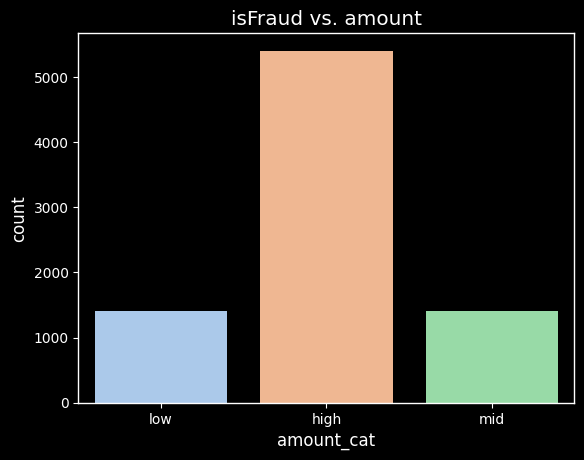

In [ ]:
sns.countplot(data = fraud, x = 'amount_cat', palette='pastel')
plt.title('isFraud vs. amount')
plt.style.use('ggplot')
plt.grid(visible=False)
plt.style.use('dark_background')

most fraudulent transactions are of high amount above the 75% quantile

In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'amount_cat'],
      dtype='object')

In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_cat
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,low
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,low
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,low
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,low
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,low
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,high
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,high
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,high
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,high


In [ ]:
X = df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
y = df['isFraud']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [ ]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

prediction = rfc.predict(X_test)

print(classification_report(y_test, prediction))
print('\n')
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.96      0.70      0.81      2710

    accuracy                           1.00   2099665
   macro avg       0.98      0.85      0.90   2099665
weighted avg       1.00      1.00      1.00   2099665



[[2096868      87]
 [    818    1892]]


training the model with random forest classifier produced a really good result with good precision and few mislabelled data or errors, i will try to boost this using xgboost

In [ ]:
import xgboost as xgb

# Convert the data to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the hyperparameters
params = {'max_depth': 5, 'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}

# Train the XGBoost classifier
xgb_clf = xgb.train(params, dtrain, num_boost_round=100)

# Predict on the test set
y_pred = xgb_clf.predict(dtest)

y_pred = y_pred.round()


In [ ]:
print(classification_report(y_test, y_pred))
print('\n')
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.96      0.65      0.77      2710

    accuracy                           1.00   2099665
   macro avg       0.98      0.82      0.89   2099665
weighted avg       1.00      1.00      1.00   2099665



[[2096877      78]
 [    949    1761]]


on xgboost it bearly increased the precision but that also affected the f1-score and recall, it had fewer false negatives but more false positives

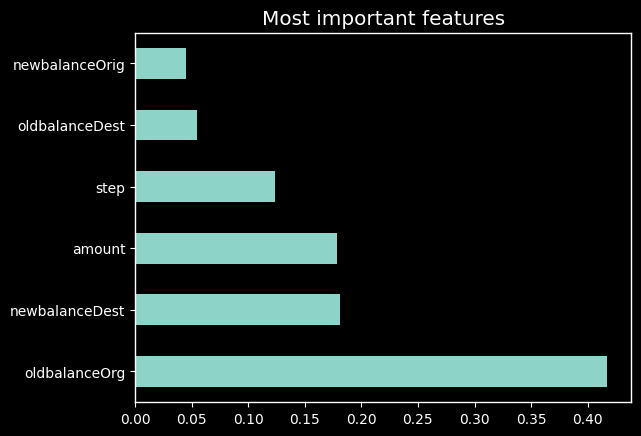

In [37]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Most important features')
plt.grid(visible=False)
plt.show()